In [2]:
!pip install yfinance

!pip install PyPortfolioOpt

In [3]:
# import necessary packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math

from pypfopt.efficient_frontier import EfficientFrontier
from pypfopt import risk_models
from pypfopt import expected_returns
from scipy.stats import norm

import yfinance as yf

In [4]:
# webscrape stock prices
tickers = ['AXP', 'AMGN','AAPL', 'BA', 'CAT', 'CSCO', 'CVX', 'GS', 'HD', 'HON', 'IBM', 'INTC', 'JNJ', 'KO', 'JPM', 'MCD', 'MMM', 'MRK',
           'MSFT', 'NKE', 'PG', 'TRV', 'UNH', 'CRM', 'VZ', 'V', 'WBA', 'WMT', 'DIS', 'DOW']
port_len = len(tickers)
price_data = []

start = '2020-03-07'
end = '2022-03-07'

for stock in range(port_len):
  stock_object = yf.Ticker(tickers[stock])
  prices = stock_object.history(start = start, end = end)
  price_data.append(prices['Close'])


df_stocks = pd.concat(price_data, axis = 1)
df_stocks.columns = tickers
df_stocks.tail()

,AXP,AMGN,AAPL,BA,CAT,CSCO,CVX,GS,HD,HON,...,PG,TRV,UNH,CRM,VZ,V,WBA,WMT,DIS,DOW
Date,,,,,,,,,,,,,,,,,,,,,
2022-02-28,194.539993,226.479996,165.119995,205.339996,187.580002,55.770000,144.000000,339.290009,315.829987,189.750000,...,155.889999,171.830002,475.869995,210.529999,53.669998,216.119995,46.090000,135.160004,148.460007,58.959999
2022-03-01,178.059998,225.210007,163.199997,194.910004,182.830002,54.619999,149.720001,328.200012,320.250000,183.600006,...,153.309998,167.820007,476.250000,208.889999,53.610001,208.970001,45.009998,135.990005,145.699997,57.130001
2022-03-02,180.309998,228.589996,166.559998,197.809998,192.610001,56.150002,154.139999,336.380005,327.369995,186.440002,...,153.789993,173.679993,485.380005,210.389999,54.139999,208.479996,46.150002,136.160004,147.339996,59.200001
2022-03-03,179.889999,232.639999,166.229996,188.850006,194.850006,56.070000,156.220001,333.420013,324.359985,187.520004,...,154.360001,173.600006,486.589996,204.750000,54.660000,207.229996,46.720001,139.289993,145.570007,59.669998
2022-03-04,172.949997,232.910004,163.169998,180.839996,195.660004,56.509998,158.649994,329.670013,324.260010,187.429993,...,155.139999,173.399994,498.649994,203.009995,55.110001,200.289993,47.720001,142.820007,140.720001,58.830002


In [5]:
# calculating the optimal sharpe ratio (best weights for each asset in the portfolio)

# calculating annualized mean expected return for each asset
mu = expected_returns.mean_historical_return(df_stocks)

# sample variance (aka risk/volatility)
sigma = risk_models.sample_cov(df_stocks)

# max sharpe ration (tangent to the Efficient Frontier)
ef = EfficientFrontier(mu, sigma, weight_bounds = (0, 1))
sharpe = ef.max_sharpe() 

In [6]:
# to hold pct change values
ticker_rx2 = []

# convert weights to a list, not dict
sh_wt = list(sharpe.values())
sh_wt = np.array(sh_wt)

# convert stock prices into cumulative return(aka holding period return)
for stock in range(port_len):
  # find daily percent change
  ticker_rx = df_stocks[[tickers[stock]]].pct_change()

  # add one so that you can find cumulative product by mult subsequent vals
  ticker_rx = (ticker_rx + 1).cumprod()

  # append to list to save all values
  ticker_rx2.append(ticker_rx[[tickers[stock]]])

ticker_final = pd.concat(ticker_rx2, axis = 1)
ticker_final.head()



,AXP,AMGN,AAPL,BA,CAT,CSCO,CVX,GS,HD,HON,...,PG,TRV,UNH,CRM,VZ,V,WBA,WMT,DIS,DOW
Date,,,,,,,,,,,,,,,,,,,,,
2020-03-09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-03-10,1.050972,1.042496,1.072022,1.016904,1.023254,1.055848,1.053428,1.066779,1.072413,1.057765,...,1.038687,1.029002,1.023991,1.066993,1.012359,1.067025,1.014864,1.022448,1.068136,1.028497
2020-03-11,0.970394,1.001411,1.034790,0.832328,0.967522,0.976027,1.029255,0.994676,1.018314,1.003467,...,0.961485,0.969019,1.015872,1.022221,0.982088,1.010635,0.951074,0.976699,1.011116,0.916803
2020-03-12,0.849832,0.918688,0.932599,0.681604,0.886519,0.874605,0.945333,0.871940,0.911647,0.882180,...,0.877477,0.879346,0.915777,0.929766,0.917070,0.935429,0.846821,0.888102,0.879827,0.775303
2020-03-13,1.013328,1.018803,1.044333,0.749219,0.957432,0.991570,1.034090,1.025230,0.983778,0.977431,...,0.982854,0.924699,0.999190,0.977316,0.970267,1.027464,0.953551,0.973882,0.982463,0.841467


Text(0.5, 1.0, 'HPR of Dow 30')

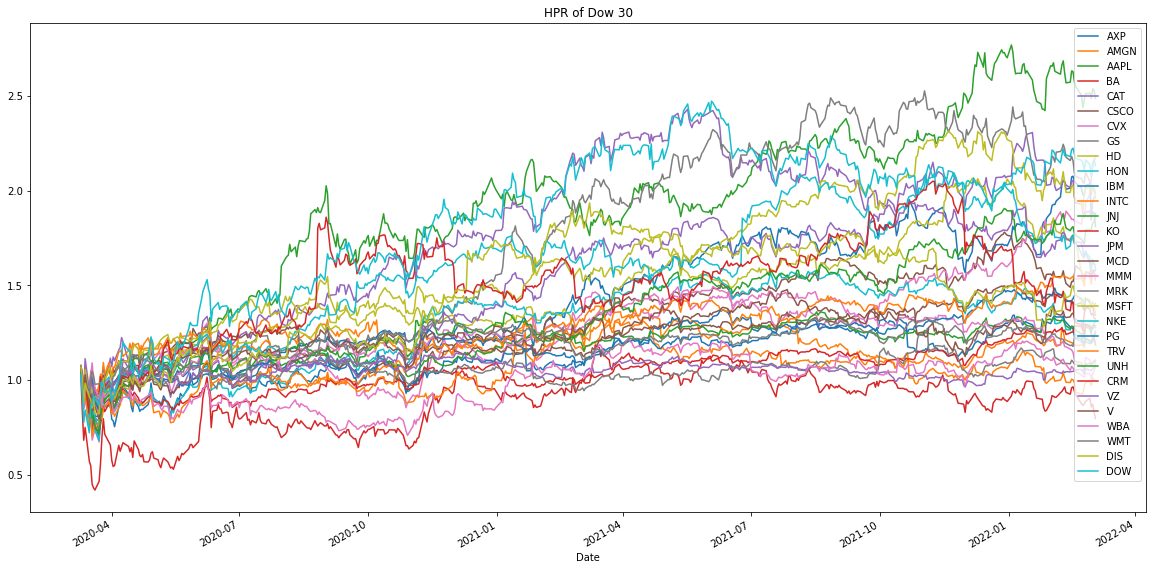

In [7]:
# plotting the holding period returns (HPR)
plt.figure(figsize=(20, 10))

for col in ticker_final.columns:
  ticker_final[col].plot()


plt.legend(ticker_final.columns)
plt.title("HPR of Dow 30")


In [8]:
# finding the expected portfolio return 
hpr_lat = []
price = []

for stock in range(port_len):
  # getting the final hpr value for each stock
  hpr_lat.append(ticker_final.iloc[[-1], [stock]])

  # getting the final stock price for each stock
  price.append(df_stocks.iloc[[-1], [stock]])

# store last hpr value in numpy array 
hpr_lat2 = pd.concat(hpr_lat, axis = 1)
hpr_lat2 = np.array(hpr_lat2)

# storing last price for each stock in price 
price = pd.concat(price, axis = 1)
price = np.array(price)

# calculating volatility of expect return 
var_sigma = hpr_lat2.std()

# calculating weighted expected returns (dot product of latest hpr and asset weights)
exp_ret = hpr_lat2.dot(sh_wt)

print("The expected weighted return of the DOW 30 portfolio for the past two years is " + str(exp_ret))

# annualizing returns (over 2 years)
exp_ret = (exp_ret**.5) - 1

# weighted value for latest stock price
price = price.dot(sh_wt)
print(exp_ret, var_sigma, price)

The expected weighted return of the DOW 30 portfolio for the past two years is [2.31906591]
[0.52284796] 0.3968176837496406 [171.70850994]


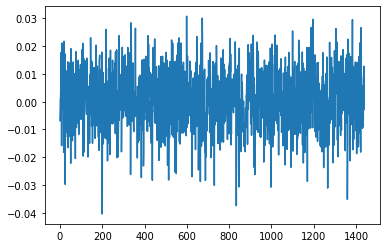

In [9]:
time = 1440

plt.plot(np.random.normal(exp_ret/time, var_sigma/math.sqrt(time), time))

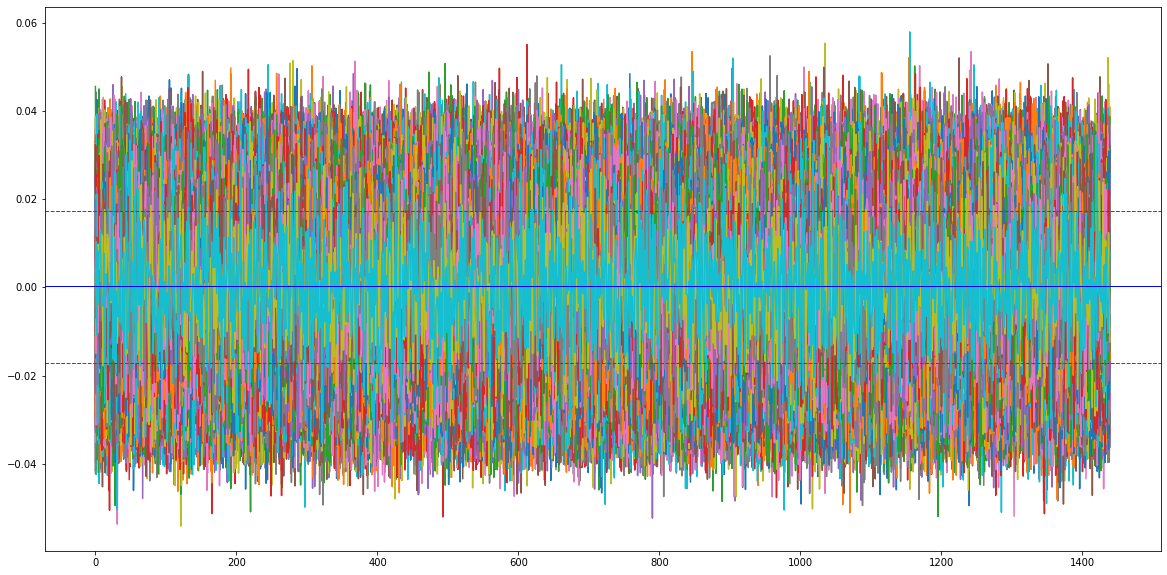

In [10]:
# over 1 day (1440 minutes)
time = 1440

plt.figure(figsize = (20, 10))
returns_list = []

for i in range(10000): 
  # random.normal: (mean, std, number of samples drawn)
  daily_return = np.random.normal(exp_ret/time, var_sigma/math.sqrt(time), time)
  returns_list.append(daily_return)
  plt.plot(daily_return)

plt.axhline(np.percentile(daily_return, 5), color = 'r', linestyle = 'dashed', linewidth = 1)
plt.axhline(np.percentile(daily_return, 95), color = 'g', linestyle = 'dashed', linewidth = 1)
plt.axhline(np.mean(daily_return), color = 'b', linestyle = 'solid', linewidth = 1)

plt.show()

In [12]:
flatten_list = [ret for iter in returns_list for ret in iter]

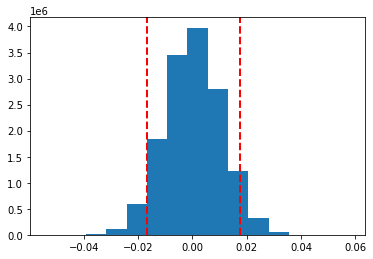

In [14]:
plt.hist(flatten_list, bins = 15)
plt.axvline(np.percentile(flatten_list,5), color = 'r', linestyle = 'dashed', linewidth = 2)
plt.axvline(np.percentile(flatten_list, 95), color = 'r', linestyle = 'dashed', linewidth = 2)
plt.show()

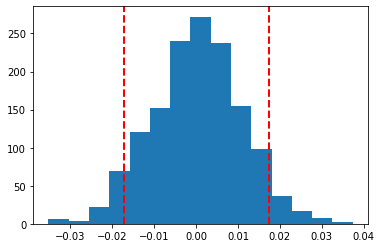

In [15]:
plt.hist(daily_return, bins = 15)
plt.axvline(np.percentile(daily_return,5), color = 'r', linestyle = 'dashed', linewidth = 2)
plt.axvline(np.percentile(daily_return, 95), color = 'r', linestyle = 'dashed', linewidth = 2)
plt.show()

In [16]:
print(np.percentile(daily_return, 5), np.percentile(daily_return, 95))
print(np.percentile(flatten_list, 5), np.percentile(flatten_list, 95))

-0.017132131739644754 0.01732680534972409
-0.016839744036744826 0.0175639266494018
